# Practical Work: Mountain Bike suspension



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.misc import derivative
import pandas as pd
%matplotlib nbagg

In [2]:
class Suspension:
    """
    Mountain Bike Suspension.
    
    Inputs:
    * m: mass
    * k: suspension spring stiffness
    * d: damping
    * h: bike height [m]
    * xd: ground altitude [m]
    """
    def __init__(self, m = 1., k = 1., d = 0., h = 1., g = 9.81, xd = None):
        self.m = m
        self.k = k
        self.d = d
        self.h = h
        self.g  = g
        if xd == None:
             def xd(t):
                    return 0*t
        self.xd = xd
        self.sol = pd.DataFrame(columns = ["t", "x", "dotx", "ddotx", "F"],
                                data = [[0., h-m*g/k, 0., 0., 0.]])
    
    
    def force(self, X, t):
        """
        Force applied by the suspension on the mass.
        """
        k = self.k
        d = self.d
        h = self.h
        xd = self.xd(t)
        dotxd = self.dotxd(t)
        x, dotx = X
        F = -k *(x-xd-h) - d*(dotx-dotxd)
        F *= F > 0.
        return F
    
    def dotxd(self, t):
        return derivative(self.xd, t)
    
    def derivative(self, X, t):
        """
        ODE
        """
        m = self.m
        g  = self.g
        xd = self.xd(t)
        dotxd = self.dotxd(t)
        x, dotx = X
        F = self.force(X, t)
        ddotx = F / m - g
        return np.array([dotx, ddotx])
    
    def solve(self, nt = 100, dt = 1.e-2):
        """
        Solves the equation
        """
        X0 = self.sol.iloc[-1][["x", "dotx"]].values
        t0 = self.sol.t.values[-1]
        t  =  np.arange(nt+1) * dt + t0
        sol = odeint(self.derivative, X0, t)
        force = self.force(sol.T, t)
        ddotx = self.derivative(sol.T, t)[1]
        new_data = pd.DataFrame(columns = ["t", "x", "dotx", "ddotx", "F"],
                                data = np.array([t, sol[:, 0], sol[:, 1], ddotx, force]).T)
        self.sol = pd.concat([self.sol, new_data], 
                              ignore_index = True)
        
        

In [24]:
V = 40./3.6 


def xd(t):
    a = .3
    b = 4.
    s = 1.
    x = V*t
    return a * np.exp(-.5*((x-b)/s)**2)
s = Suspension(k=9000., m = 50., g = 9.81, d = 1000, xd = xd)
s.solve(nt = 1000, dt = 2.e-3)
s.sol.head()

,t,x,dotx,ddotx,F
0,0.000,0.9455,0.000000,0.000000,0.000000
1,0.000,0.9455,0.000000,0.018115,491.405749
2,0.002,0.9455,0.000037,0.019044,491.452218
3,0.004,0.9455,0.000076,0.020066,491.503296
4,0.006,0.9455,0.000117,0.021187,491.559348


<IPython.core.display.Javascript object>


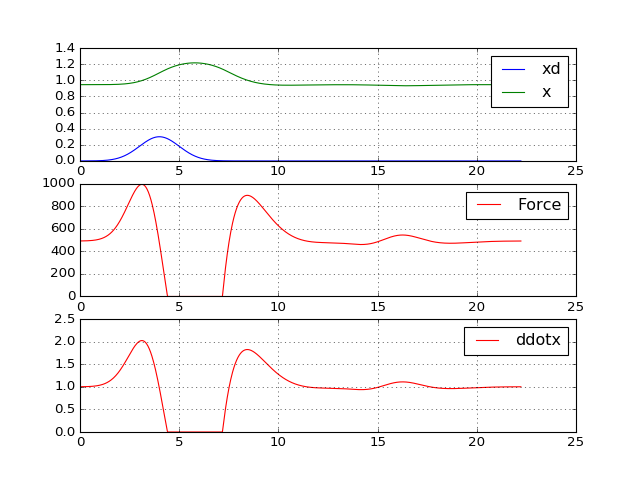

In [25]:
d = s.sol
fig = plt.figure()
ax = fig.add_subplot(3,1,1)
plt.plot(d.t*V, xd(d.t), label = "xd")
plt.plot(d.t*V, d.x, label = "x")
plt.grid()
plt.legend()
ax = fig.add_subplot(3,1,2)
plt.plot(d.t*V, d.F, "r-", label = "Force")
plt.grid()
plt.legend()
ax = fig.add_subplot(3,1,3)
plt.plot(d.t*V, d.ddotx / s.g + 1, "r-", label = "ddotx")
plt.grid()
plt.legend()
plt.show()

In [15]:
s.force(s.sol[["x", "dotx"]].values.T, s.sol.t.values)

array([491.4057491 , 491.4057491 , 491.48898553, ...,  -0.        ,
        -0.        ,  -0.        ])

In [11]:
p = 50*9.81
d = 140.e-3 *.4
p/d

8758.92857142857

In [7]:
derivative(xd, np.linspace(0., 1., 10))

array([7.96854612e-243, 2.77085187e-225, 2.09852506e-208, 3.46163796e-192,
       1.24370037e-176, 9.73232299e-162, 1.65876131e-147, 6.15769134e-134,
       4.97872991e-121, 8.76770342e-109])